In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from statsmodels.multivariate.pca import PCA
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [56]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Exploratory Data Analysis (EDA)

In [57]:
# Displaying basic information of the test dataset
df_test = pd.read_csv('activity_test.csv')
df_test.head()

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1,...,fBodyGyroJerkMag_Skewness_1,fBodyGyroJerkMag_Kurtosis_1,tBodyAcc_AngleWRTGravity_1,tBodyAccJerk_AngleWRTGravity_1,tBodyGyro_AngleWRTGravity_1,tBodyGyroJerk_AngleWRTGravity_1,tXAxisAcc_AngleWRTGravity_1,tYAxisAcc_AngleWRTGravity_1,tZAxisAcc_AngleWRTGravity_1,activity
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074,5
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825,5
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302,5
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079,5
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849,5


In [58]:
# Displaying basic information of the train dataset
df_train = pd.read_csv('activity_train.csv')
df_train.head()

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1,...,fBodyGyroJerkMag_Skewness_1,fBodyGyroJerkMag_Kurtosis_1,tBodyAcc_AngleWRTGravity_1,tBodyAccJerk_AngleWRTGravity_1,tBodyGyro_AngleWRTGravity_1,tBodyGyroJerk_AngleWRTGravity_1,tXAxisAcc_AngleWRTGravity_1,tYAxisAcc_AngleWRTGravity_1,tZAxisAcc_AngleWRTGravity_1,activity
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5


In [59]:
# Displaying basic information of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 562 entries, tBodyAcc_Mean_1 to activity
dtypes: float64(561), int64(1)
memory usage: 33.3 MB


In [60]:
# Generating statistical summary of the training data
df_train.describe()

,tBodyAcc_Mean_1,tBodyAcc_Mean_2,tBodyAcc_Mean_3,tBodyAcc_STD_1,tBodyAcc_STD_2,tBodyAcc_STD_3,tBodyAcc_Mad_1,tBodyAcc_Mad_2,tBodyAcc_Mad_3,tBodyAcc_Max_1,...,fBodyGyroJerkMag_Skewness_1,fBodyGyroJerkMag_Kurtosis_1,tBodyAcc_AngleWRTGravity_1,tBodyAccJerk_AngleWRTGravity_1,tBodyGyro_AngleWRTGravity_1,tBodyGyroJerk_AngleWRTGravity_1,tXAxisAcc_AngleWRTGravity_1,tYAxisAcc_AngleWRTGravity_1,tZAxisAcc_AngleWRTGravity_1,activity
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888,3.934595
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196,2.160171
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560,2.000000
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583,4.000000
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000,12.000000


In [61]:
# Displaying basic information of the training dataset
df_train['activity'].value_counts()

activity
5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: count, dtype: int64

In [62]:
# Displaying basic information of the training dataset columns
df_train.columns

Index(['tBodyAcc_Mean_1', 'tBodyAcc_Mean_2', 'tBodyAcc_Mean_3',
       'tBodyAcc_STD_1', 'tBodyAcc_STD_2', 'tBodyAcc_STD_3', 'tBodyAcc_Mad_1',
       'tBodyAcc_Mad_2', 'tBodyAcc_Mad_3', 'tBodyAcc_Max_1',
       ...
       'fBodyGyroJerkMag_Skewness_1', 'fBodyGyroJerkMag_Kurtosis_1',
       'tBodyAcc_AngleWRTGravity_1', 'tBodyAccJerk_AngleWRTGravity_1',
       'tBodyGyro_AngleWRTGravity_1', 'tBodyGyroJerk_AngleWRTGravity_1',
       'tXAxisAcc_AngleWRTGravity_1', 'tYAxisAcc_AngleWRTGravity_1',
       'tZAxisAcc_AngleWRTGravity_1', 'activity'],
      dtype='object', length=562)

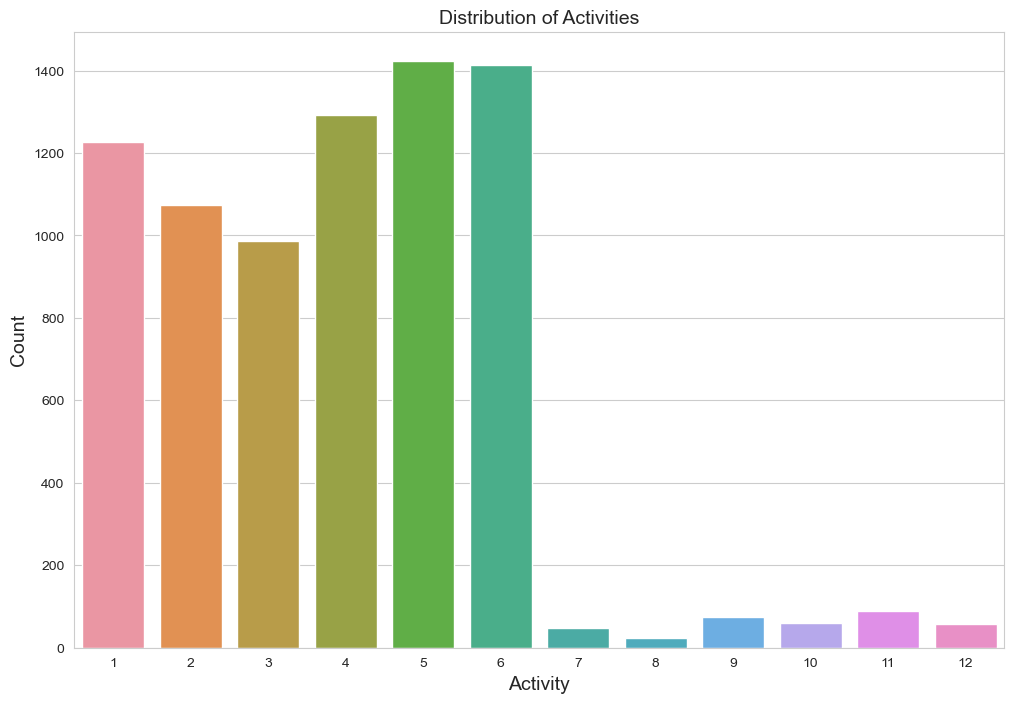

In [63]:
sns.set_style('whitegrid')
# Distribution of Activities in the Training Data
plt.figure(figsize=(12, 8))
sns.countplot(x='activity', data=df_train)
plt.title('Distribution of Activities') 
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

#### Insights from the distribution of activities
Dominant Activities: The activities represented by bars 5 (Standing) and 6 (Laying) have the highest counts, each with over 1400 instances in the dataset. This suggests that the dataset has a higher representation of these two activities.

Moderately Represented Activities: Activities 1 (Walking), 2 (Walking Upstairs), 3 (Walking Downstairs), and 4 (Sitting) have a moderate representation in the dataset, with each activity having counts ranging from approximately 1000 to 1300 instances.

Minority Classes: The dataset includes several activities (7 to 12) that are significantly underrepresented compared to others, each with fewer than 100 instances. Specifically, activities 7 and 8 are the least common, with activity 8 having the fewest instances, indicated by the shortest bar on the chart.

Potential Class Imbalance: The stark difference in the number of instances among the activities suggests a class imbalance in the dataset. Such an imbalance may affect the performance of machine learning models, potentially leading them to be biased toward predicting the majority classes (activities 5 and 6) more often.

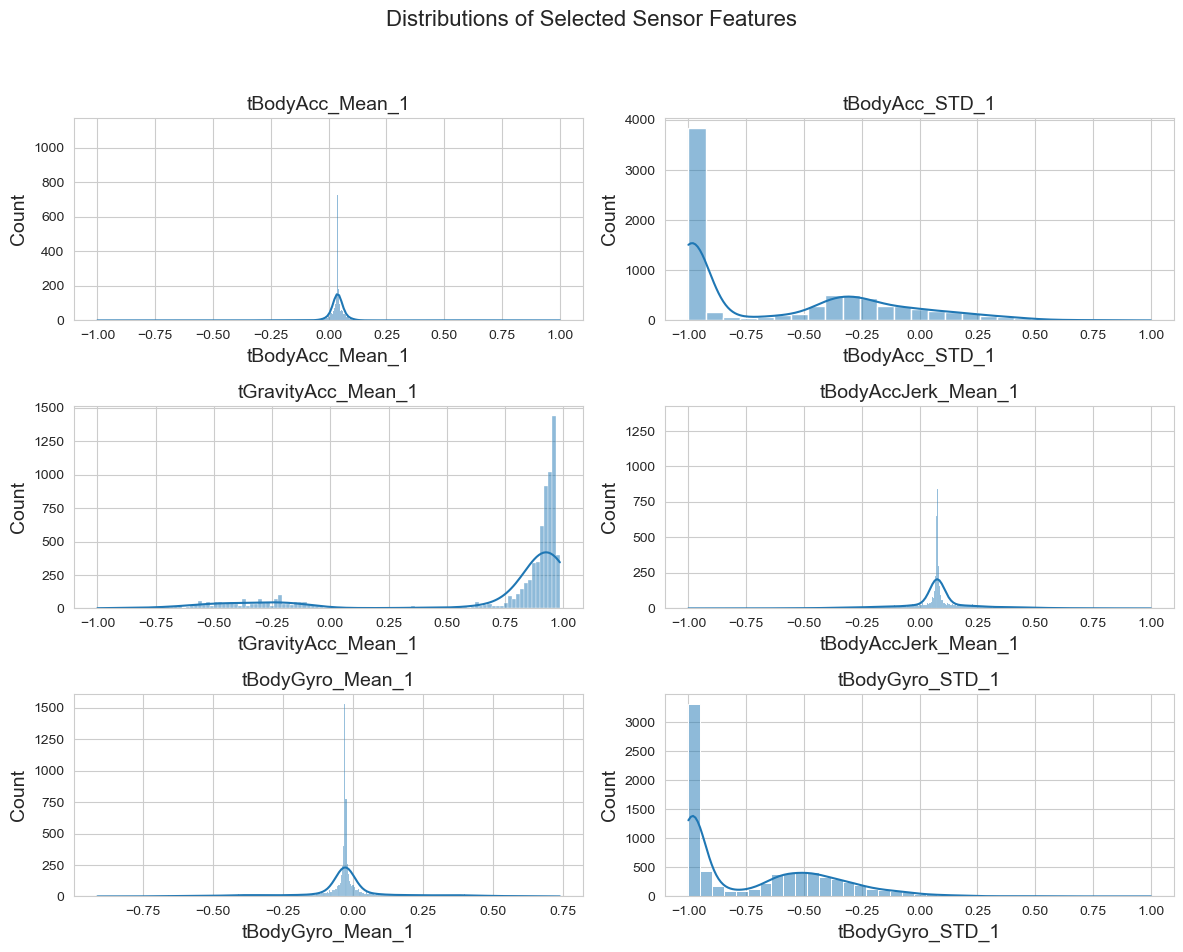

In [64]:
# Selecting a subset of features for distribution analysis
# Taking a few features from different categories
sample_features = ['tBodyAcc_Mean_1', 'tBodyAcc_STD_1', 'tGravityAcc_Mean_1',
                   'tBodyAccJerk_Mean_1', 'tBodyGyro_Mean_1', 'tBodyGyro_STD_1']

# Plotting distributions of the selected features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Distributions of Selected Sensor Features', fontsize=16)

# Plotting the distributions of the selected features
for i, feature in enumerate(sample_features):
    sns.histplot(df_train[feature], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Insights from distribution of selected features

tBodyAcc_Mean_1:
This feature shows a normal distribution centered around a mean slightly above 0. This suggests that the body acceleration in the X-axis is generally stable and centered around a specific value with some variations.
tBodyAcc_STD_1:
This feature has a left-skewed distribution, indicating that the standard deviation of body acceleration in the X-axis for most activities is low, suggesting consistent movement patterns.
 
tGravityAcc_Mean_1:
The distribution of the mean gravity acceleration in the X-axis is right-skewed, with most values concentrated on the left. This skewness might be due to the orientation of the smartphone during the activities, which predominantly tilts in one direction.
tBodyAccJerk_Mean_1:
The mean jerk signal for body acceleration in the X-axis appears to have a distribution similar to a normal distribution. This indicates that the jerkiness of movements is relatively symmetrical around the mean value, with sudden movements in either direction from the mean being equally likely.
tBodyGyro_Mean_1:
The mean angular velocity around the X-axis has a distribution centered around zero with some outliers. This suggests that while some activities involve rotation around the X-axis, it is typically not pronounced.
tBodyGyro_STD_1:
This feature has a left-skewed distribution, similar to tBodyAcc_STD_1, indicating that the standard deviation of angular velocity is generally low, implying consistent gyroscopic readings across most activities.

In [65]:
# Target column is  'activity'
features = df_train.drop('activity', axis=1) # Features 
labels = df_train['activity'] # Target column

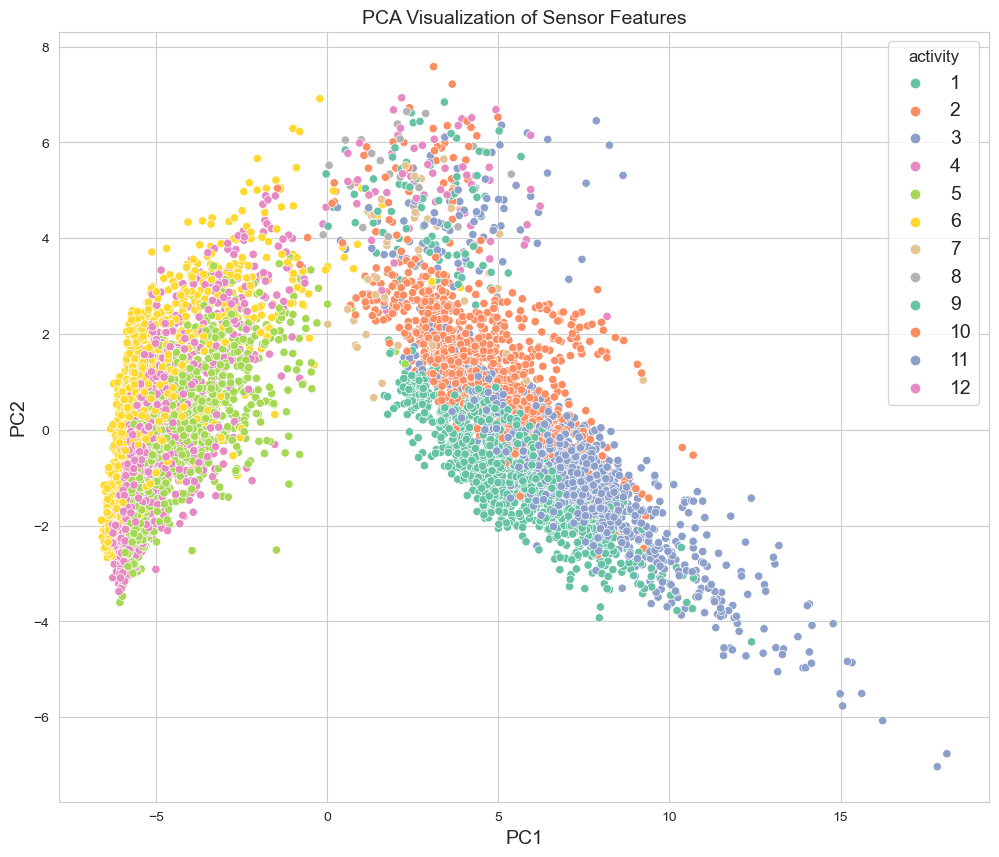

In [66]:
# PCA and visualizing the results
pca= PCA(n_components=2)
principal_components = pca.fit_transform(features) # Fit the model with features and apply the dimensionality reduction on features
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']) # Created a DataFrame with the principal components
pca_df['activity'] = labels # Added the target column to the DataFrame

plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='activity', data=pca_df, palette='Set2')
plt.title('PCA Visualization of Sensor Features')
plt.show()

#### Insights from PCA Visualization of Sensor Features
##### Separation of Activities:
Activities such as 1 (Walking), 2 (Walking Upstairs), and 3 (Walking Downstairs) show a good level of separation from the rest, indicating that the PCA could capture the variance that distinguishes these activities well.
There is some overlap between activities, particularly those that are stationary or involve similar postures, such as Sitting (4), Standing (5), and Laying (6).

##### Variance Captured by Components:
The first principal component (PC1) appears to capture a significant amount of variance, as indicated by the spread of data along this axis.
The second principal component (PC2) also captures a meaningful amount of variance, providing additional separation between activities.

##### Influence of Dynamic vs. Static Activities:
Dynamic activities (e.g., Walking, Walking Upstairs, Walking Downstairs) form more elongated clusters, which may be attributed to the variability in motion captured by the sensor data. Static activities (e.g., Standing, Sitting, Laying) tend to form denser clusters, possibly reflecting the reduced movement and thus less sensor variance.

##### Outliers:
There are some points that are distant from the main clusters, particularly along PC2. These may represent outliers or unusual sensor readings.

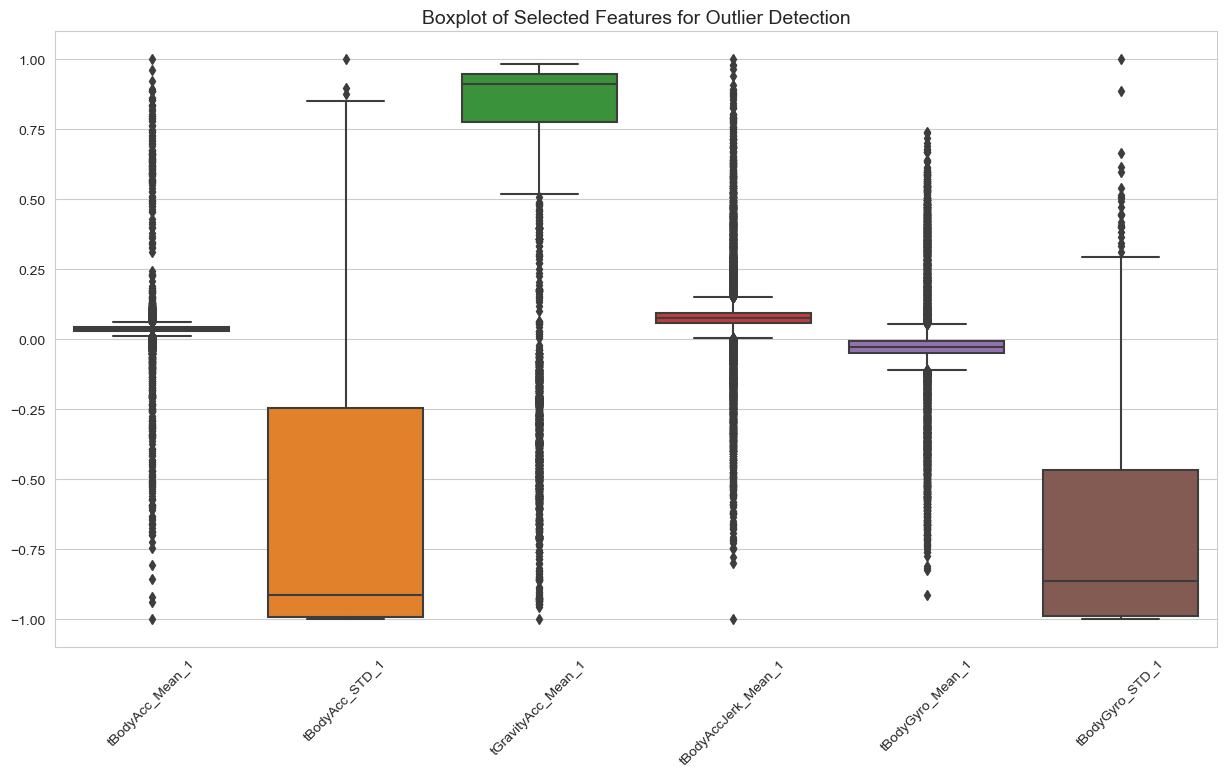

Series([], dtype: int64)

In [67]:
# Outlier Detection using Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_train[sample_features])
plt.title('Boxplot of Selected Features for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Missing Values Analysis
missing_values = df_train.isnull().sum() # Count of missing values in each column
missing_values_summary = missing_values[missing_values > 0] # Selecting columns with missing values
missing_values_summary 


#### Insights from Outlier Detection and Missing Values Analysis
Central Tendency and Spread:
Each boxplot shows the median (central line in the box), the 25th to 75th percentile range (the box itself), and the overall range (the whiskers), excluding outliers for each feature.
The tBodyAcc_Mean_1 feature has a median near 0 and a symmetrical box, suggesting a relatively even distribution around the median.
The tGravityAcc_Mean_1 and tBodyGyro_Mean_1 features have medians that are slightly above 0, indicating a slight positive skew in their central tendencies.

Outlier Detection:
Outliers are shown as individual points outside the whiskers. They could be due to variability in the sensor measurements, errors, or extraordinary movements not typical of the general activity.
tBodyAcc_STD_1 and tBodyGyro_STD_1 demonstrate numerous outliers, which suggests that there were many instances where the standard deviation of body acceleration and gyroscopic readings were unusually high or low.

Variability:
The interquartile range (IQR), represented by the length of the box, indicates the variability in the middle 50% of the data. A longer box implies greater variability. For example, tBodyGyro_STD_1 shows a relatively large IQR, suggesting more variability in the angular velocity readings. Comparatively, tBodyAcc_STD_1 has a smaller IQR, indicating less variability in body acceleration standard deviation readings.

### Random Forest Model

In [68]:
# Random Forest model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separating features and labels
X_train = df_train.drop('activity', axis=1)
y_train = df_train['activity']

# Loading the test data and separating features and labels
X_test = df_test.drop('activity', axis=1)
y_test = df_test['activity']

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [70]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Evaluating the model on the test data 
rf_predictions = rf_model.predict(X_test_scaled)
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           1       0.89      0.96      0.93       496
           2       0.88      0.91      0.89       471
           3       0.96      0.86      0.91       420
           4       0.90      0.89      0.89       508
           5       0.90      0.91      0.91       556
           6       1.00      1.00      1.00       545
           7       0.72      0.78      0.75        23
           8       0.90      0.90      0.90        10
           9       0.67      0.75      0.71        32
          10       0.66      0.76      0.70        25
          11       0.72      0.59      0.65        49
          12       0.72      0.48      0.58        27

    accuracy                           0.91      3162
   macro avg       0.83      0.82      0.82      3162
weighted avg       0.91      0.91      0.91      3162


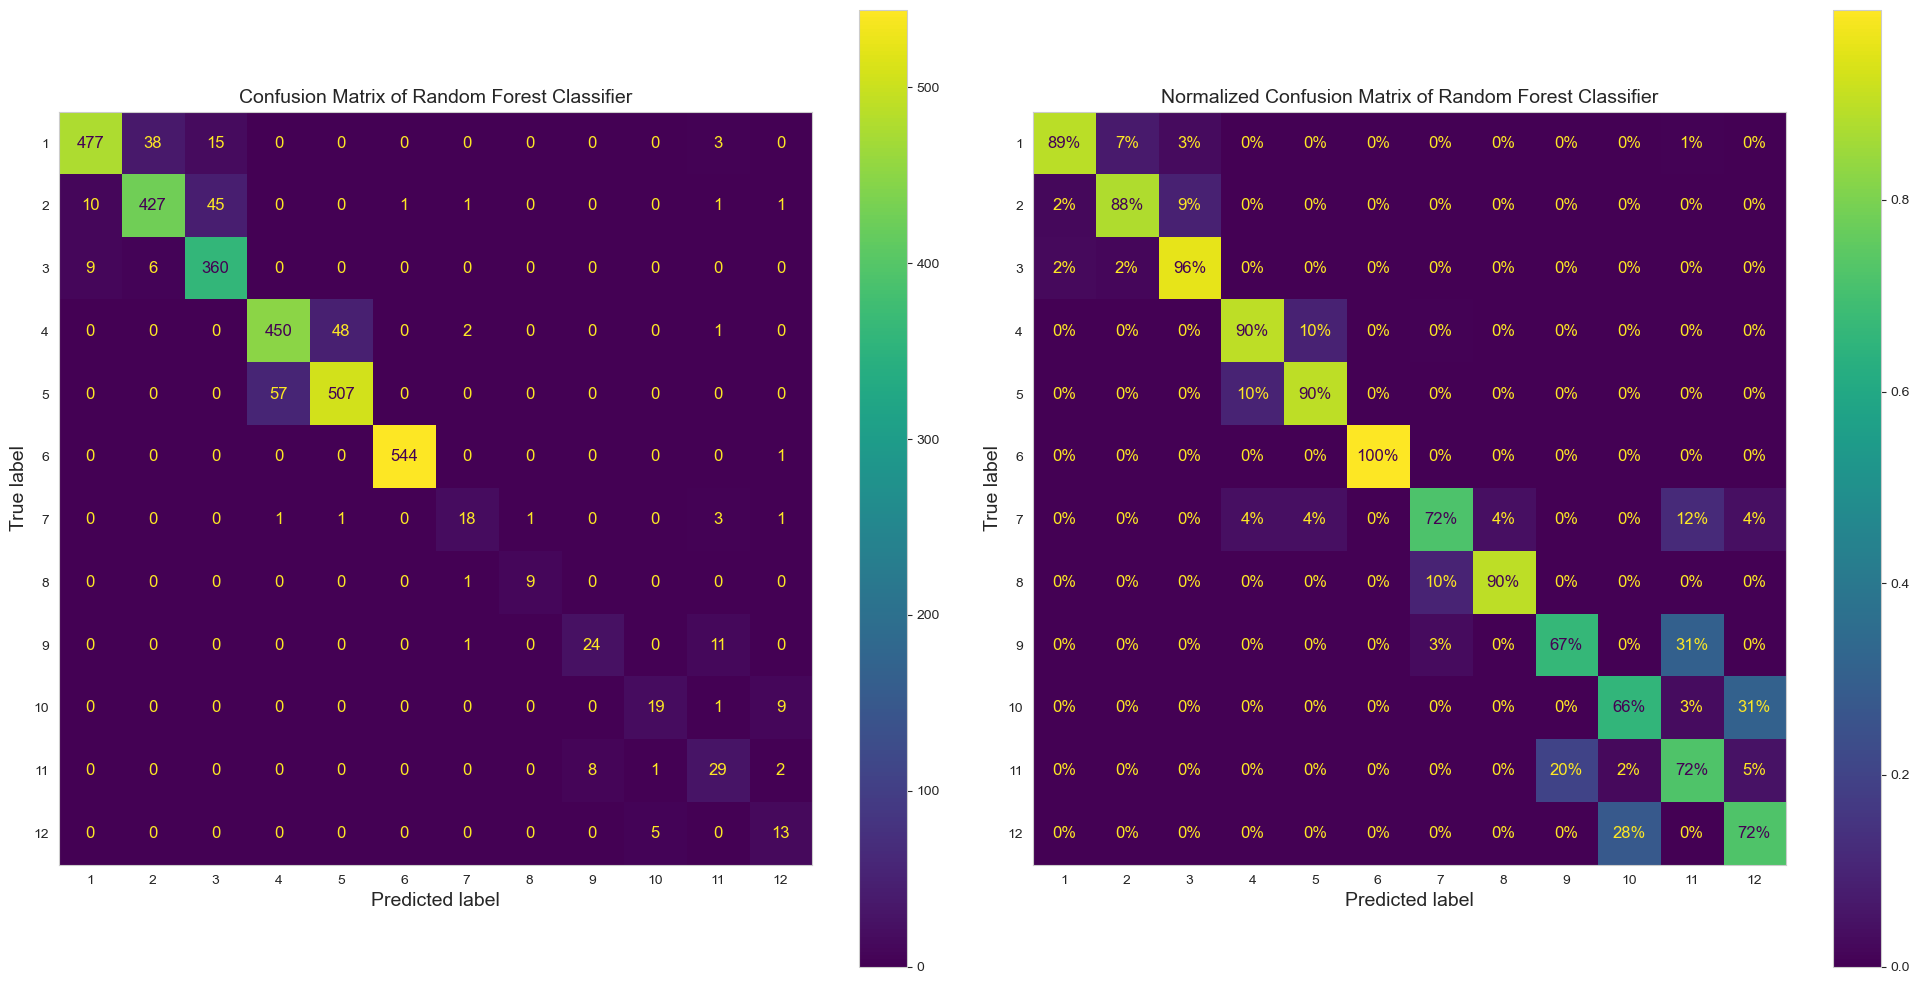

In [71]:
# plot the confusion matrix
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(rf_predictions, y_test, ax=axs[0], cmap='viridis')
axs[0].set_title('Confusion Matrix of Random Forest Classifier')
axs[0].grid(False)

plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(rf_predictions, y_test, ax=axs[1], normalize='true', values_format='.0%')
axs[1].set_title('Normalized Confusion Matrix of Random Forest Classifier')
axs[1].grid(False)

for ax in axs:
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()

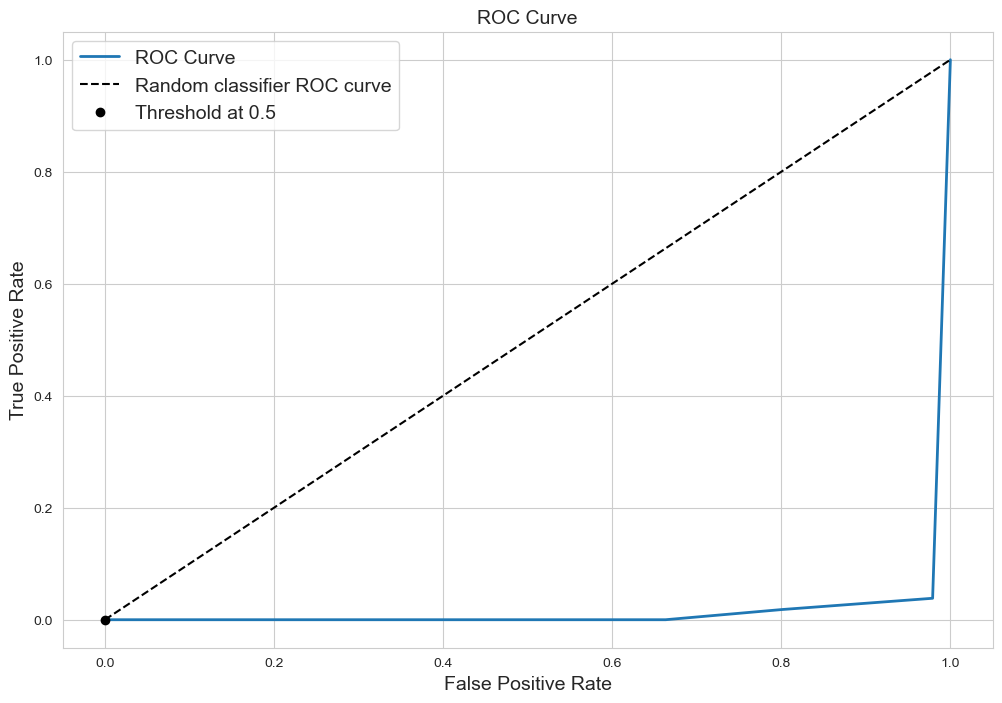

In [72]:
# Roc Curve
from sklearn.metrics import roc_curve

# Plot the ROC curve for the Random Forest model
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions, pos_label=1)

# Finding the threshold closest to zero
idx_for_threshold_at_0_5 = (thresholds >= 0.5).argmax()
tpr_0_5, fpr_0_5 = tpr[idx_for_threshold_at_0_5], fpr[idx_for_threshold_at_0_5]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier ROC curve')
plt.plot(fpr_0_5, tpr_0_5, 'ko', label='Threshold at 0.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [73]:
# Defining the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 30, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid Search for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 30},
 0.9025363718295352)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     mean_test_score                   param value
0           0.885799      param_n_estimators    10
1           0.894425      param_n_estimators    30
2           0.899833      param_n_estimators    50
3           0.877173      param_n_estimators    10
4           0.895713      param_n_estimators    30
..               ...                     ...   ...
427         0.895841  param_min_samples_leaf     4
428         0.893653  param_min_samples_leaf     4
429         0.891078  param_min_samples_leaf     4
430         0.894554  param_min_samples_leaf     4
431         0.898416  param_min_samples_leaf     4

[432 rows x 3 columns]


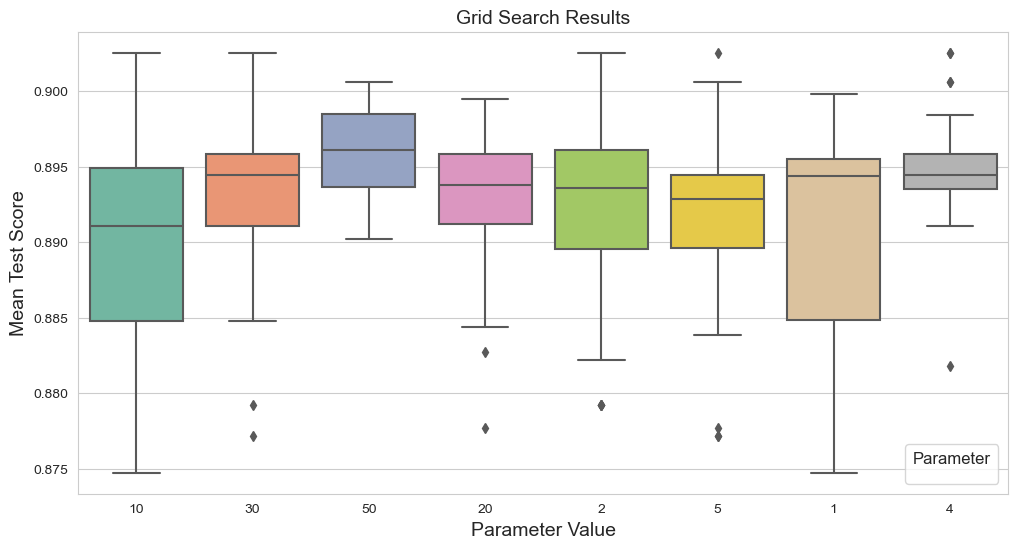

In [74]:
# Convert the cv_results_ to a DataFrame
cv_results_df = pd.DataFrame(grid_search_rf.cv_results_)

# Select the columns related to the parameters and the mean test score
selected_columns = ['param_' + key for key in param_grid_rf.keys()] + ['mean_test_score']
cv_results_df = cv_results_df[selected_columns]

# Select DataFrame to make it suitable for a seaborn pointplot
cv_results_df = cv_results_df.melt(id_vars='mean_test_score', var_name='param', value_name='value')

print(cv_results_df)

# Create the pointplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_results_df, x='value', y='mean_test_score',  palette='Set2')
plt.title('Grid Search Results')
plt.xlabel('Parameter Value')
plt.ylabel('Mean Test Score')
plt.legend(title='Parameter')
plt.show()

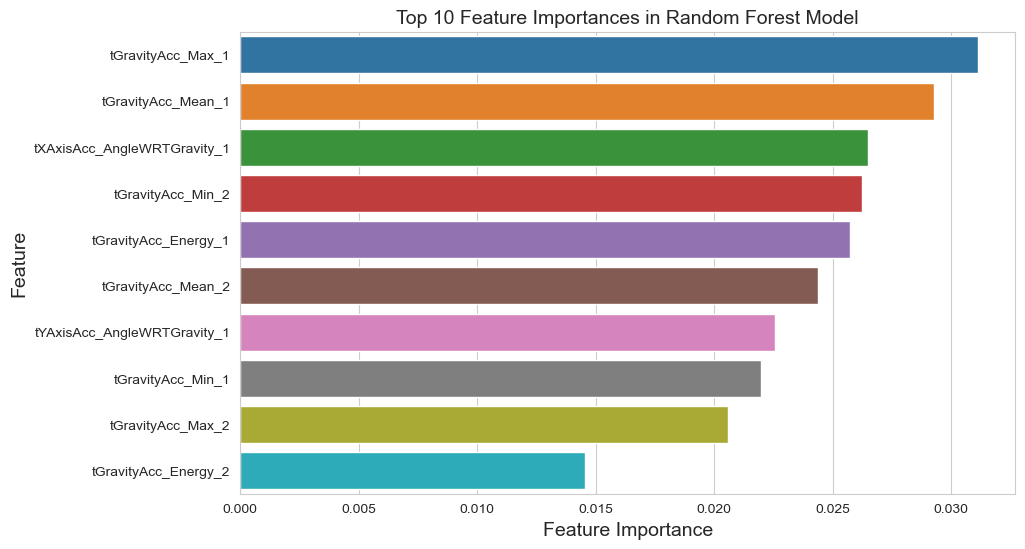

In [75]:
# Extracting feature importances
feature_importances_rf = rf_model.feature_importances_

# Sorting the feature importances in descending order
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

# Visualizing the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances in Random Forest Model")
sns.barplot(x=feature_importances_rf[sorted_indices_rf[:10]], y=X_train.columns[sorted_indices_rf[:10]])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

### XGBoost Model

In [76]:
# Encoding the labels 
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [77]:
# XGBoost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [78]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_model.fit(X_train_scaled, y_train,
        eval_set=[(X_test_scaled, y_test)], early_stopping_rounds=2)
y_pred_xgb = xgb_model.predict(X_test_scaled)


/opt/anaconda3/envs/SVM/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.34263
[1]	validation_0-mlogloss:1.05353
[2]	validation_0-mlogloss:0.85861
[3]	validation_0-mlogloss:0.73492
[4]	validation_0-mlogloss:0.63632
[5]	validation_0-mlogloss:0.55945
[6]	validation_0-mlogloss:0.50204
[7]	validation_0-mlogloss:0.45611
[8]	validation_0-mlogloss:0.41700
[9]	validation_0-mlogloss:0.38715
[10]	validation_0-mlogloss:0.36418
[11]	validation_0-mlogloss:0.34227
[12]	validation_0-mlogloss:0.32885
[13]	validation_0-mlogloss:0.31403
[14]	validation_0-mlogloss:0.30297
[15]	validation_0-mlogloss:0.29224
[16]	validation_0-mlogloss:0.28409
[17]	validation_0-mlogloss:0.27909
[18]	validation_0-mlogloss:0.27422
[19]	validation_0-mlogloss:0.26764
[20]	validation_0-mlogloss:0.26382
[21]	validation_0-mlogloss:0.26140
[22]	validation_0-mlogloss:0.26104
[23]	validation_0-mlogloss:0.25539
[24]	validation_0-mlogloss:0.25391
[25]	validation_0-mlogloss:0.25198
[26]	validation_0-mlogloss:0.24933
[27]	validation_0-mlogloss:0.24993
[28]	validation_0-mlogloss:0.2

In [79]:
# Evaluating the model on the test data
xgb_predictions_encoded = xgb_model.predict(X_test_scaled)
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)
xgb_report = classification_report(y_test, xgb_predictions, zero_division=1)

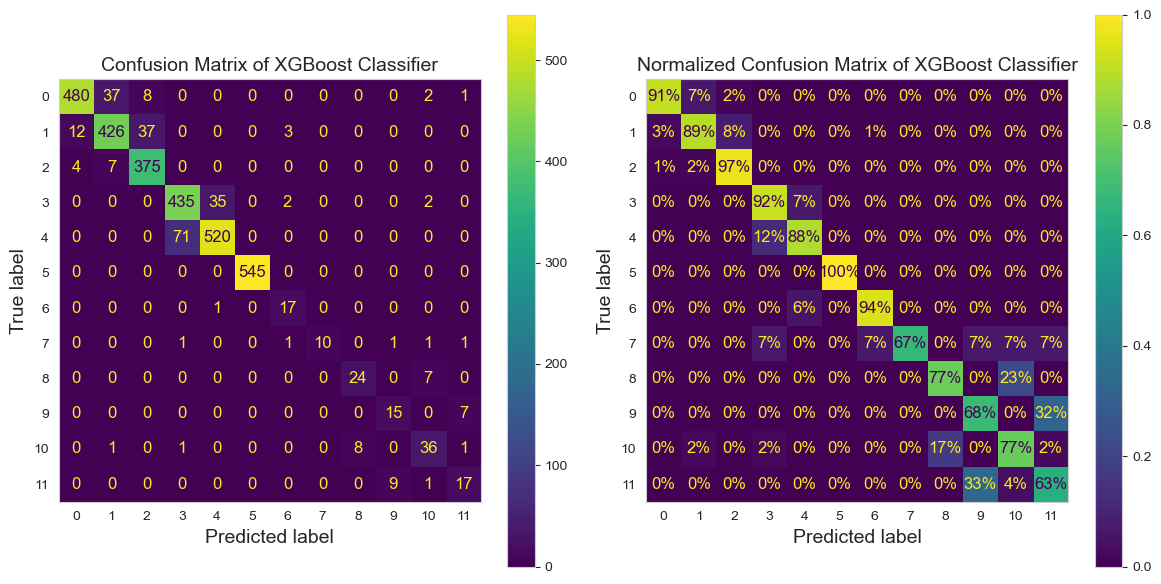

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot the confusion matrix
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(y_pred_xgb, y_test, ax=axs[0])
axs[0].set_title('Confusion Matrix of XGBoost Classifier')
axs[0].grid(False)

plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(y_pred_xgb, y_test, ax=axs[1], normalize='true', values_format='.0%')
axs[1].set_title('Normalized Confusion Matrix of XGBoost Classifier')
axs[1].grid(False)

for ax in axs:
    ax.set_aspect('equal')
plt.tight_layout()    
plt.show()

In [81]:
print(xgb_report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       496
           1       0.07      0.08      0.07       471
           2       0.08      0.09      0.08       420
           3       0.00      0.00      1.00       508
           4       0.07      0.06      0.07       556
           5       0.00      0.00      1.00       545
           6       0.00      0.00      1.00        23
           7       0.00      0.00      1.00        10
           8       0.00      0.00      1.00        32
           9       0.00      0.00      1.00        25
          10       0.00      0.00      1.00        49
          11       0.02      0.04      0.03        27
          12       0.00      1.00      0.00         0

    accuracy                           0.03      3162
   macro avg       0.10      0.10      0.56      3162
weighted avg       0.19      0.03      0.41      3162


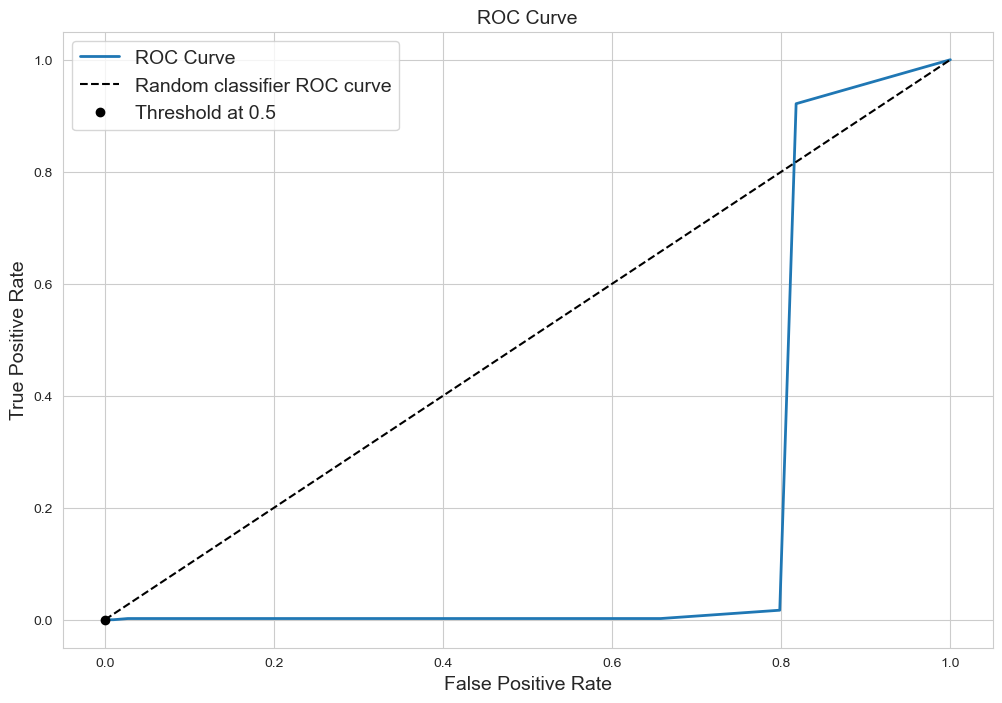

In [82]:
# ROC Curve
from sklearn.metrics import roc_curve

# Plot the ROC curve for the XGBoost model
fpr, tpr, thresholds = roc_curve(y_test, xgb_predictions_encoded, pos_label=1)

# Finding the threshold closest to zero
idx_for_threshold_at_0_5 = (thresholds >= 0.5).argmax()
tpr_0_5, fpr_0_5 = tpr[idx_for_threshold_at_0_5], fpr[idx_for_threshold_at_0_5]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier ROC curve')    
plt.plot(fpr_0_5, tpr_0_5, 'ko', label='Threshold at 0.5')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


Text(0, 0.5, 'Feature')

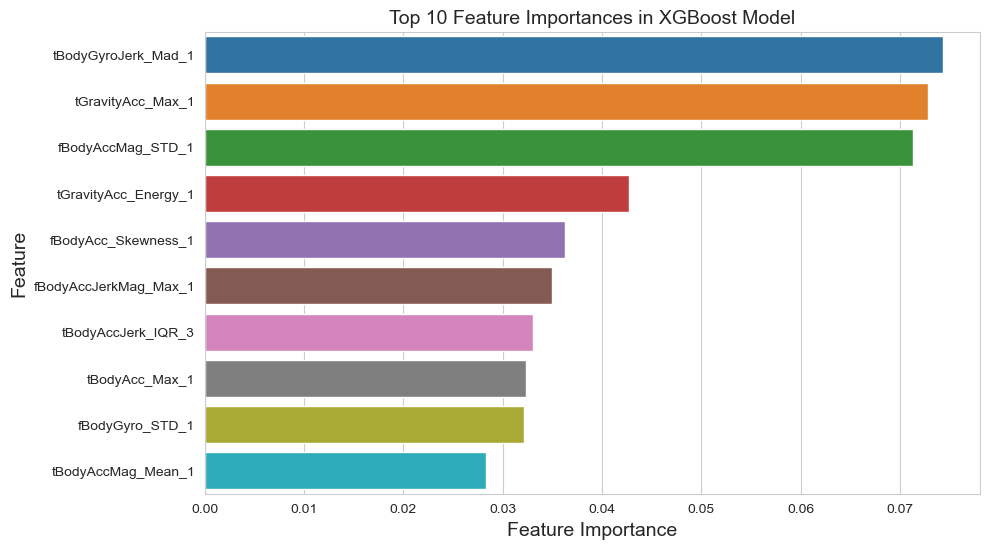

In [83]:
# Extracting feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Sorting the feature importances in descending order
sorted_indices_xgb = np.argsort(feature_importances_xgb)[::-1]

# Visualizing the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances in XGBoost Model")
sns.barplot(x=feature_importances_xgb[sorted_indices_xgb[:10]], y=X_train.columns[sorted_indices_xgb[:10]])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")


### Linear SVM Model

In [84]:
# Linear SVM with Hyperparameter Tuning
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}


In [85]:
from sklearn.model_selection import GridSearchCV

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv = 5)
# Fited the grid search to the data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [86]:
# Best parameters and best score
best_params = grid_search.best_params_
print(best_params)
# Best score
best_score = grid_search.best_score_
print(best_score)

{'C': 0.1}
0.9277791727888316


In [87]:
# Training the model using the best parameters
best_svm_model = SVC(kernel = 'linear', C =best_params['C'], random_state = 42)
best_svm_model.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [88]:
# Evaluating the model on the test data
best_svm_predictions_encoded = best_svm_model.predict(X_test_scaled)

# Calculate overall test error
sample_weight_svm = (best_svm_predictions_encoded != y_test)
test_error_svm = np.average(sample_weight_svm, weights=None)
print("Overall Test Error: ", test_error_svm)


Overall Test Error:  0.05913978494623656


In [89]:
# Evaluating accuracy, precision, and recall of the model on the test data 
accuracy = accuracy_score(y_test, best_svm_predictions_encoded)
precision = precision_score(y_test, best_svm_predictions_encoded, average='weighted')
recall = recall_score(y_test, best_svm_predictions_encoded, average='weighted')

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9408602150537635
Precision:  0.9416013518889713
Recall:  0.9408602150537635


In [90]:
# Print the classification report
print(classification_report(y_test, best_svm_predictions_encoded))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       496
           1       0.96      0.95      0.96       471
           2       0.98      0.95      0.96       420
           3       0.96      0.87      0.91       508
           4       0.90      0.97      0.93       556
           5       1.00      1.00      1.00       545
           6       0.71      0.74      0.72        23
           7       0.91      1.00      0.95        10
           8       0.59      0.59      0.59        32
           9       0.63      0.68      0.65        25
          10       0.67      0.63      0.65        49
          11       0.62      0.56      0.59        27

    accuracy                           0.94      3162
   macro avg       0.82      0.83      0.83      3162
weighted avg       0.94      0.94      0.94      3162


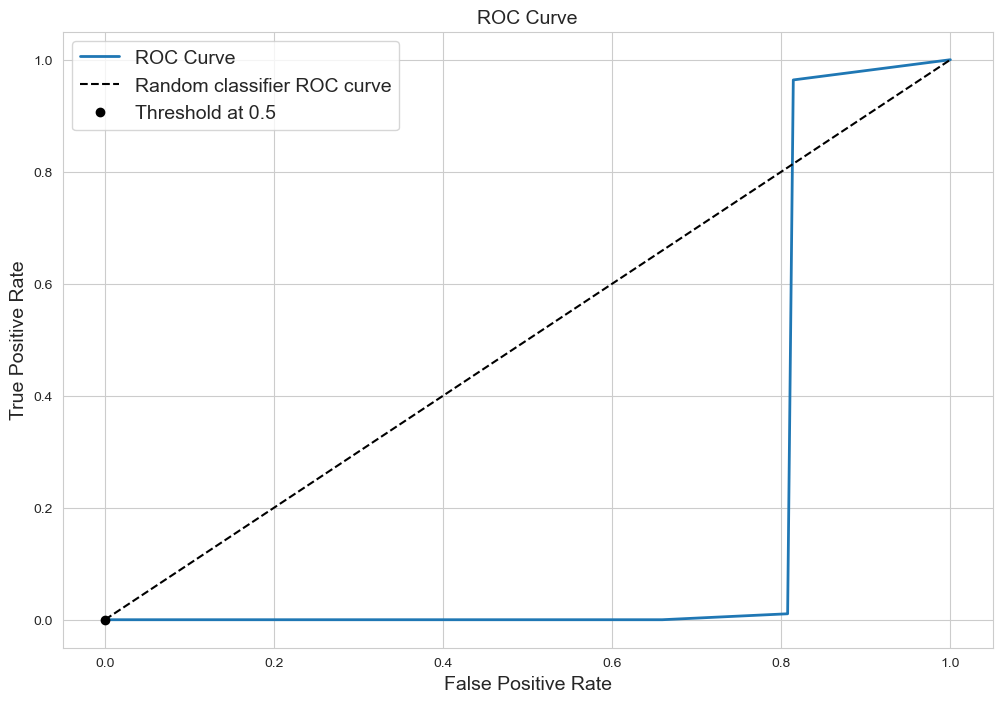

In [91]:
from sklearn.metrics import roc_curve

# Plot the ROC curve for the SVM model
fpr, tpr, thresholds = roc_curve(y_test, best_svm_predictions_encoded , pos_label=1)

# Finding the threshold closest to zero
idx_for_threshold_at_0_5 = (thresholds >= 0.5).argmax() 
tpr_0_5, fpr_0_5 = tpr[idx_for_threshold_at_0_5], fpr[idx_for_threshold_at_0_5]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='ROC Curve', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier ROC curve')  # Changed ':' to '--' for dashed line
plt.plot(fpr_0_5, tpr_0_5, 'ko', label='Threshold at 0.5')  # Fixed plot command
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

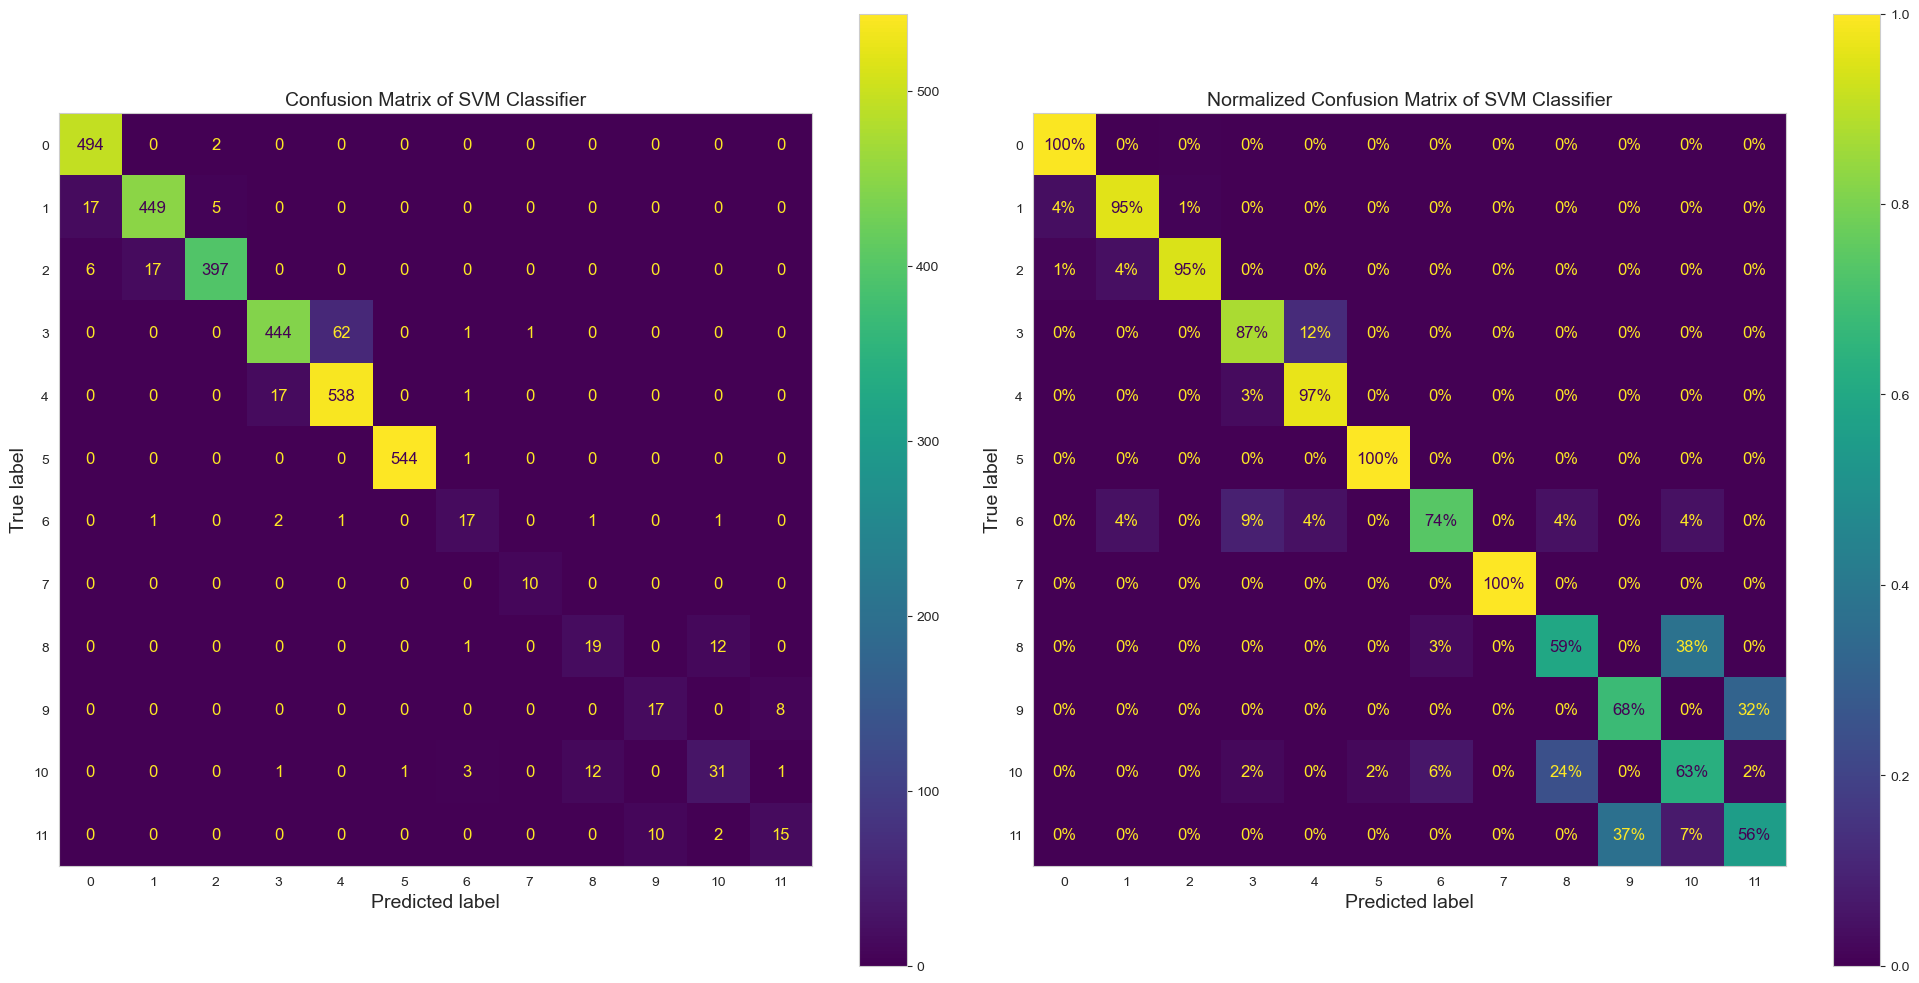

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))  

# Confusion matrix without normalization
ConfusionMatrixDisplay.from_predictions(y_test, best_svm_predictions_encoded, ax=axs[0], cmap='viridis')
axs[0].set_title('Confusion Matrix of SVM Classifier')
axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[0].grid(False) 

# Normalized confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, best_svm_predictions_encoded, ax=axs[1], normalize='true', cmap='viridis', values_format='.0%')
axs[1].set_title('Normalized Confusion Matrix of SVM Classifier')
axs[1].set_xlabel('Predicted label')
axs[1].set_ylabel('True label')
axs[1].grid(False) 

# Set the aspect of the plot to be equal
for ax in axs:
    ax.set_aspect('equal')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()



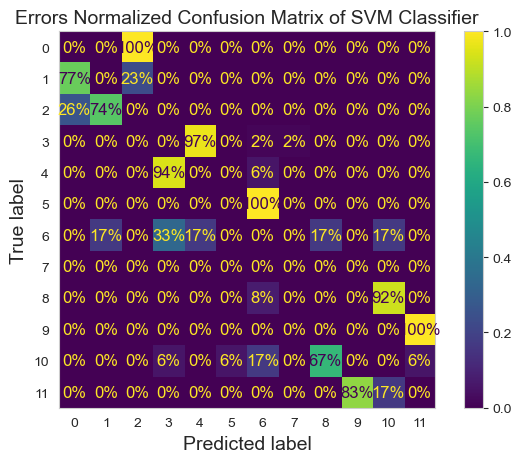

In [93]:
# Errors normalized by row
figsize = (20,10)
ConfusionMatrixDisplay.from_predictions(y_test,best_svm_predictions_encoded,  normalize='true', values_format='.0%', sample_weight=sample_weight_svm, cmap='viridis')
plt.title('Errors Normalized Confusion Matrix of SVM Classifier')
plt.grid(False)

plt.tight_layout()
plt.show()

### K-Nearest Neighbors (KNN) Model

In [94]:
# K-Nearest Neighbors (KNN) model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

<Axes: xlabel='PC1', ylabel='PC2'>

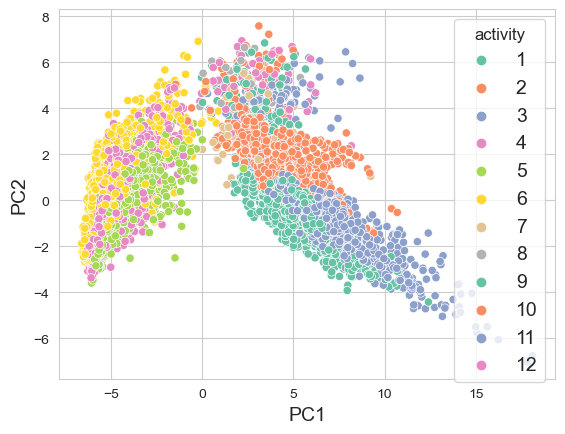

In [95]:
# PCA and visualizing the results
sns.scatterplot(x='PC1', y='PC2', hue='activity', data=pca_df, palette='Set2')

In [96]:
# Predicting the test set results
y_pred_knn = knn_model.predict(X_test_scaled)

In [97]:
# Accuracy of the model
accuracy = knn_model.score(X_test_scaled, y_test)
print("Accuracy: ",accuracy)


Accuracy:  0.8624288425047438


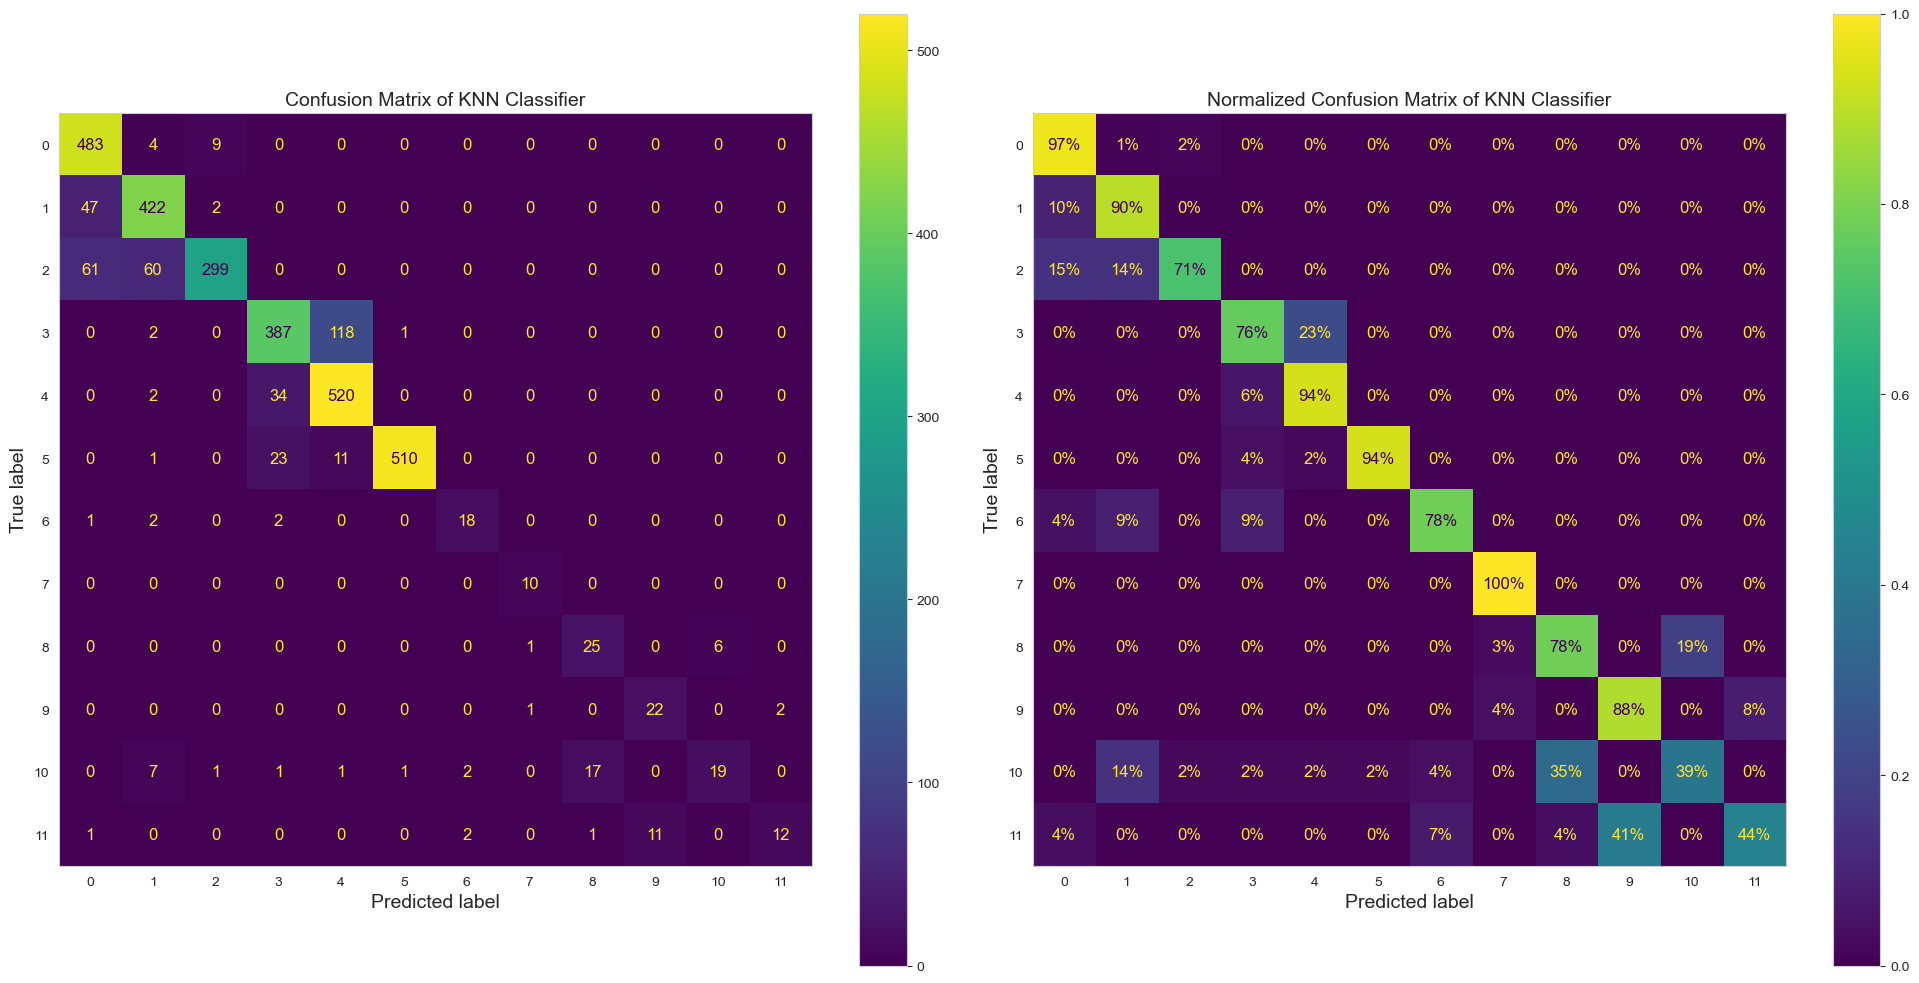

In [98]:
# Plot the confusion matrix
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, ax=axs[0])
axs[0].set_title('Confusion Matrix of KNN Classifier')
axs[0].grid(False)

plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, ax=axs[1], normalize='true', values_format='.0%')
axs[1].set_title('Normalized Confusion Matrix of KNN Classifier')
axs[1].grid(False)

for ax in axs:
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   9.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1

Text(0, 0.5, 'Cross-Validation Accuracy')

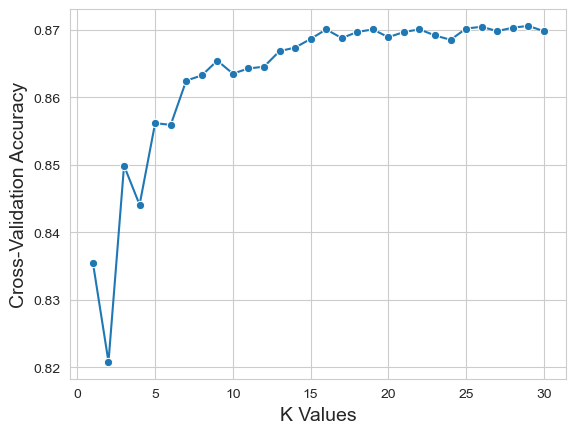

In [99]:
from sklearn.model_selection import cross_val_score

# Cross Validation
k_values = [i for i in range(1, 31)]
scores = []

# Loop through different k values
for k in k_values: # Loop through different k values
    knn = KNeighborsClassifier(n_neighbors=k) # Initialize the KNN model
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5) # Perform cross-validation
    scores.append(score.mean()) # Append the mean score to the list

# Plot the cross-validation scores
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Cross-Validation Accuracy")


In [100]:
# Train our model using the best k value
best_index = np.argmax(scores)
best_k = k_values[best_index]

# Train the model using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=29)

In [101]:
# Evaluating accuracy, precision, and recall
y_pred_knn = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.8668564199873497
Precision:  0.8774862109502197
Recall:  0.8668564199873497


### Voting Classifier

In [102]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model), ('svm', best_svm_model), ('knn', knn_model)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importan...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            predictor=None, ...)),
                             ('svm',
                              SVC(C=0.1, kernel='linear', random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [103]:
# Evaluating the model on the test data
voting_predictions_encoded = voting_clf.predict(X_test_scaled)

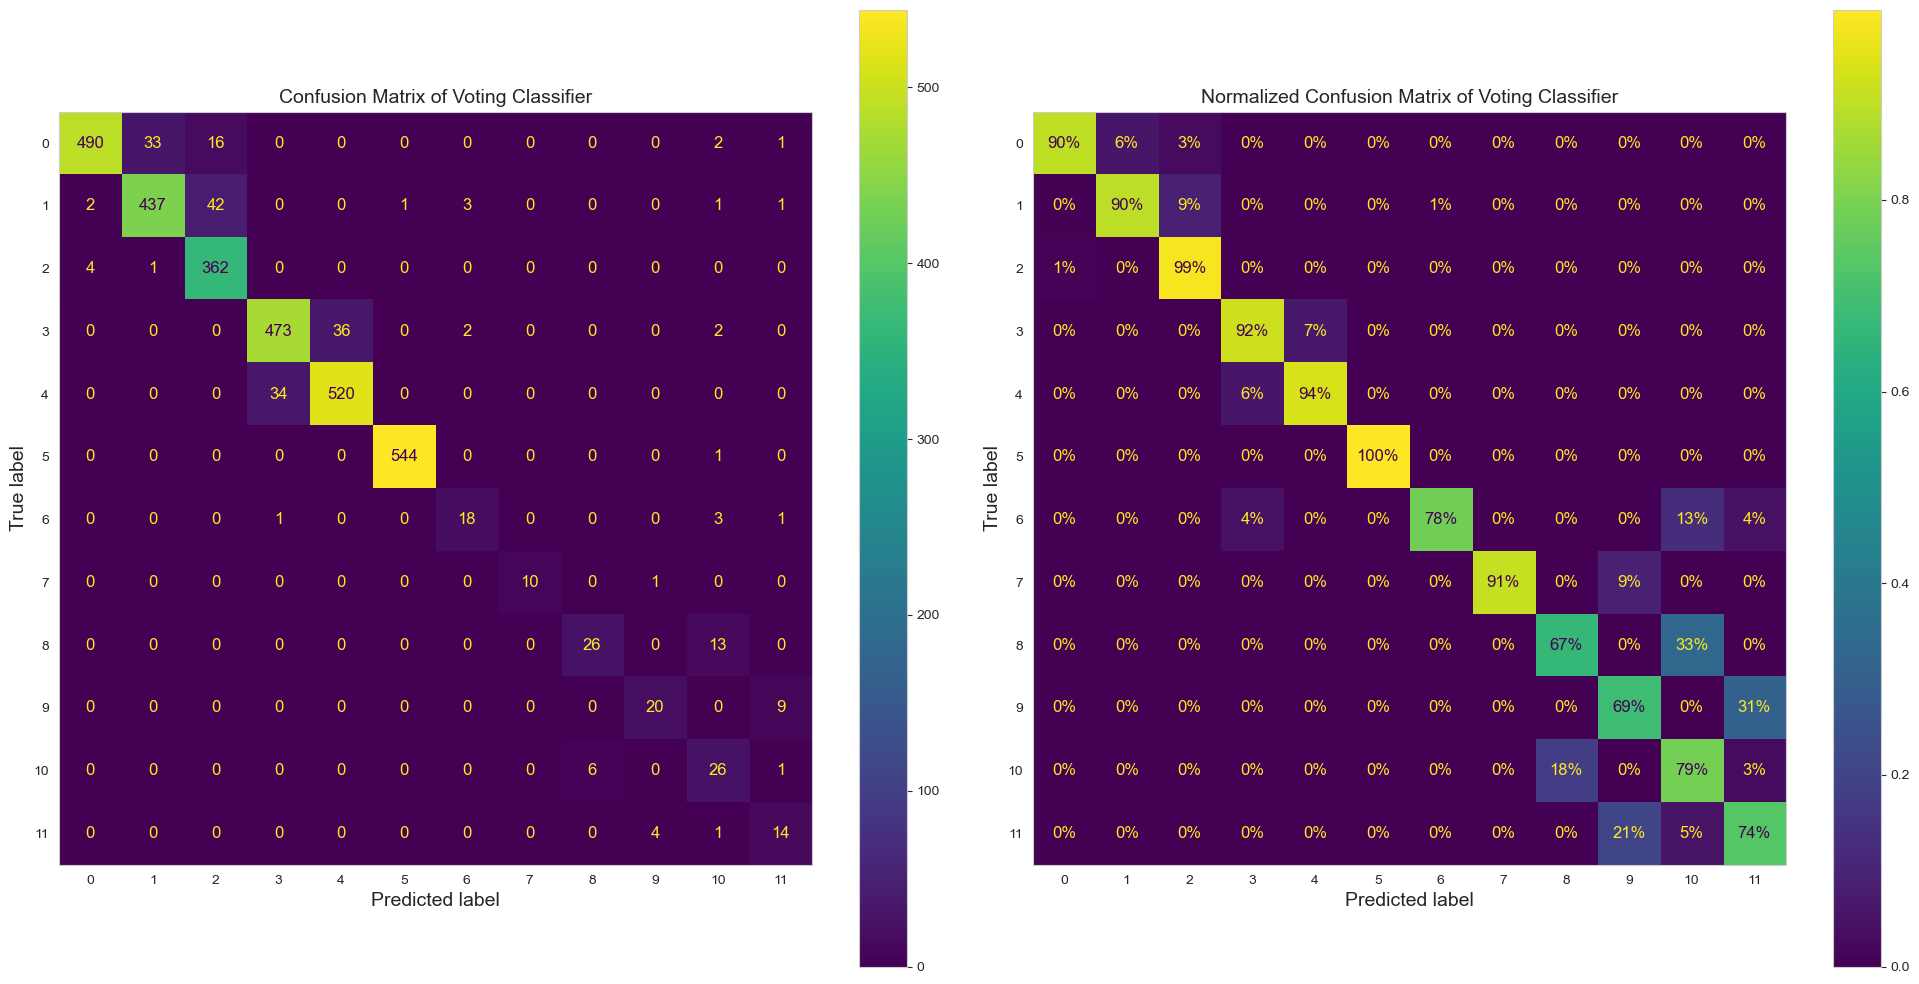

In [104]:
# Plot the confusion matrix
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(voting_predictions_encoded, y_test, ax=axs[0])
axs[0].set_title('Confusion Matrix of Voting Classifier')
axs[0].grid(False)
    
plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(voting_predictions_encoded, y_test, ax=axs[1], normalize='true', values_format='.0%')
axs[1].set_title('Normalized Confusion Matrix of Voting Classifier')
axs[1].grid(False)

for ax in axs:
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()

In [105]:
# Accuracy of the model on the test data 
voting_clf.score(X_test_scaled, y_test)

0.9297912713472486

In [106]:
# Comparing the accuracy of the models
for clf in (rf_model, xgb_model, best_svm_model, knn_model, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9098671726755219
XGBClassifier 0.9209361163820367
SVC 0.9408602150537635
KNeighborsClassifier 0.8624288425047438
VotingClassifier 0.9297912713472486
